# Q8

In [2]:
library(igraph)
network <- read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)

# find indices of core nodes
coreIndices <- which(neighborhood.size(network,1,nodes=V(network))>201)
# print num of core nodes
print(length(coreIndices))

# find the average degree of core nodes
aveCoreDeg <- mean(degree(network, v=V(network)[coreIndices]))
print(aveCoreDeg)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] 40
[1] 279.375


# Q9

In [3]:
ids <- c(1, 108, 349, 484, 1087)
pnetworks <- make_ego_graph(network, 1, nodes=V(network)[ids])

for (i in 1:5) {
    cat("id:", ids[i], "\n")
    fc <- cluster_fast_greedy(pnetworks[[i]])
    cat("  ", "fast_greedy:", modularity(fc), "\n")
    ec <- cluster_edge_betweenness(pnetworks[[i]])
    cat("  ", "edge_betweenness:", modularity(ec), "\n")
    ic <- cluster_infomap(pnetworks[[i]])
    cat("  ", "infomap:", modularity(ic), "\n")
    cat("\n")
}

id: 1 
   fast_greedy: 0.4131014 
   edge_betweenness: 0.3533022 
   infomap: 0.3891185 

id: 108 
   fast_greedy: 0.4359294 
   edge_betweenness: 0.5067549 
   infomap: 0.5082233 

id: 349 
   fast_greedy: 0.2517149 
   edge_betweenness: 0.133528 
   infomap: 0.0954642 

id: 484 
   fast_greedy: 0.5070016 
   edge_betweenness: 0.4890952 
   infomap: 0.5152788 

id: 1087 
   fast_greedy: 0.1455315 
   edge_betweenness: 0.02762377 
   infomap: 0.02690662 



# Q10

In [9]:
ids <- c(1, 108, 349, 484, 1087)

for (i in 1:5) {
    cat("id:", ids[i], "\n")
    subgraph <- induced_subgraph(network, neighbors(network, ids[i]))
    fc <- cluster_fast_greedy(subgraph)
    cat("  ", "fast_greedy:", modularity(fc), "\n")
    ec <- cluster_edge_betweenness(subgraph)
    cat("  ", "edge_betweenness:", modularity(ec), "\n")
    ic <- cluster_infomap(subgraph)
    cat("  ", "infomap:", modularity(ic), "\n")
    cat("\n")
}


id: 1 
[1] "list"
IGRAPH 8d24f6c U--- 347 2519 -- 
+ edges from 8d24f6c:
 [1]  3-- 9 17--19  2--20 14--20  9--21 13--21  7--22  3--25  9--25 21--25
[11]  3--26  9--26 13--26 21--26 25--26 14--28 16--29  9--30  7--31 21--31
[21] 25--31  7--38 21--39 25--39 21--40 25--40 26--40 29--40 14--41 17--41
[31] 19--41 20--41 28--41 33--42 20--44 41--44  1--48 30--48 23--51 25--51
[41] 31--51  1--53 24--53 48--53  1--54 27--54 48--54 53--54 21--55 26--55
[51]  9--56 13--56 21--56 25--56 26--56 30--56 40--56 55--56 24--57 48--57
[61] 13--59 56--59 56--60 23--61 26--62 56--62 56--63  7--65 13--65 25--65
[71]  9--66 21--66 26--66 56--66  3--67  9--67 10--67 13--67 21--67 25--67
[81] 26--67 31--67 40--67 45--67 55--67 56--67 62--67 66--67  9--69 25--69
+ ... omitted several edges
   fast_greedy: 0.4418533 
   infomap: 0.4180077 

id: 108 
[1] "list"
IGRAPH 254e35b U--- 1045 26750 -- 
+ edges from 254e35b:
 [1]  1-- 2  1-- 3  2-- 3  4-- 5  4-- 6  5-- 6  4-- 7  5-- 7  6-- 7  4-- 8
[11]  5-- 8  6-- 8  7

# Question 9

id: 1 
   fast_greedy: 0.4131014 
   edge_betweenness: 0.3533022 


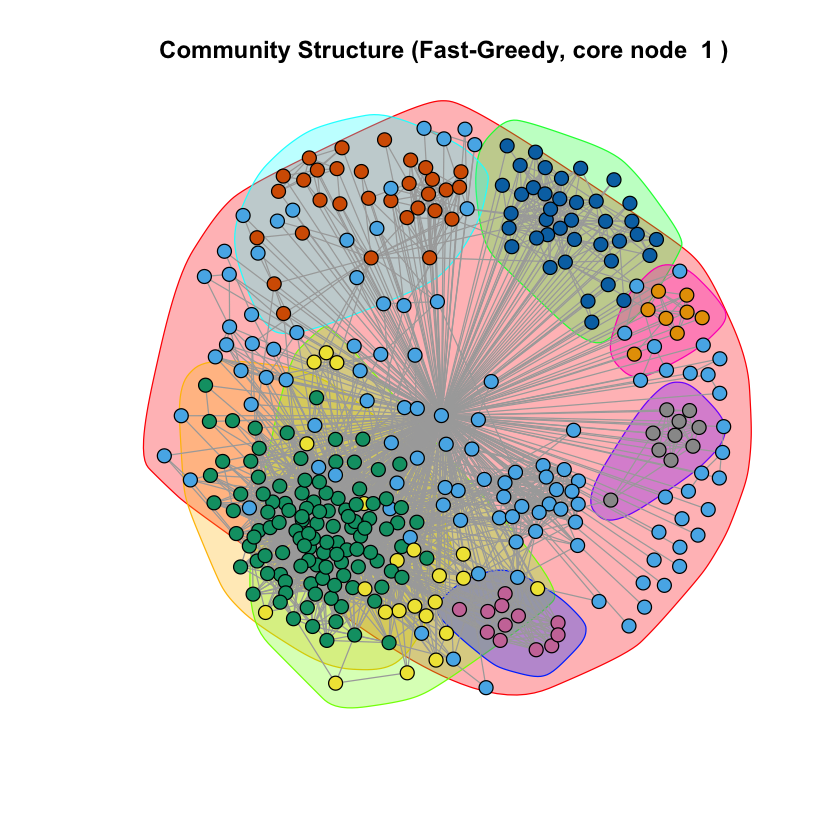

   infomap: 0.3891185 


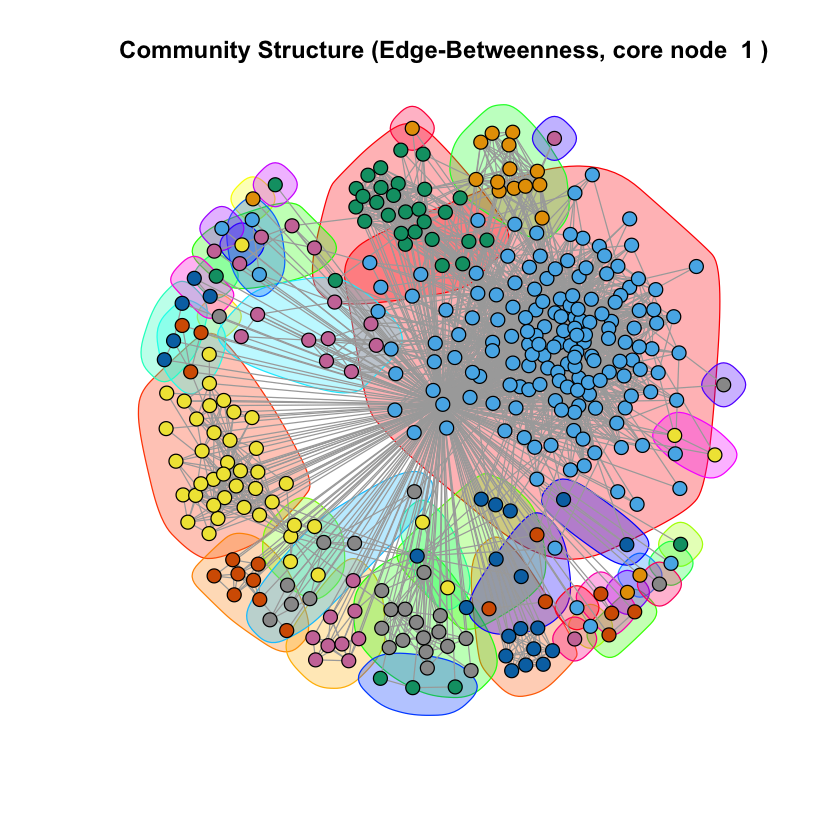


id: 108 
   fast_greedy: 0.4359294 


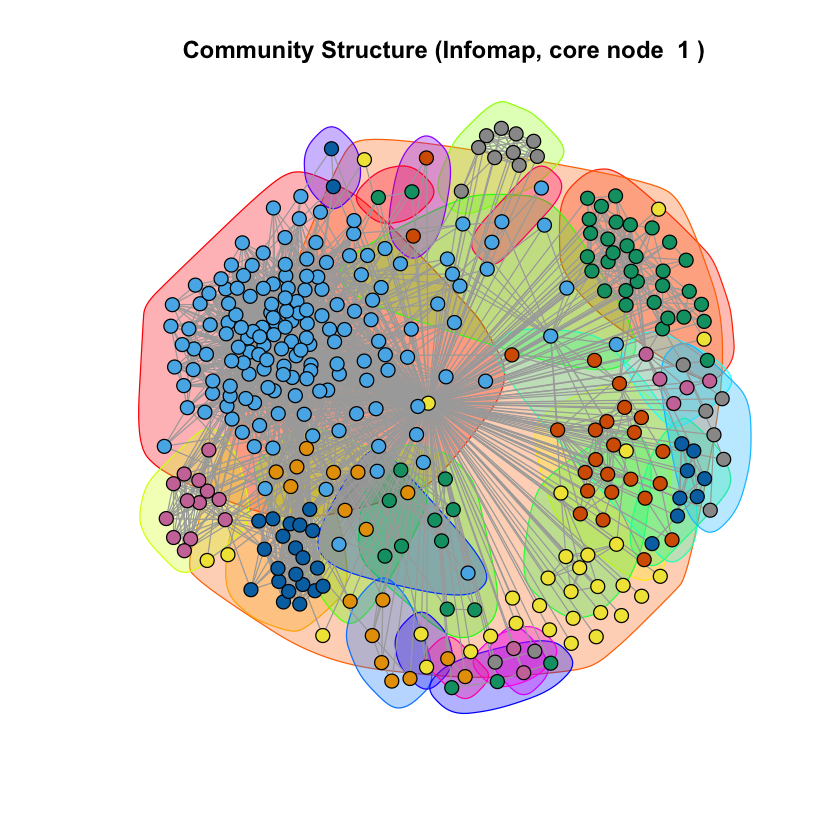

   edge_betweenness: 0.5067549 


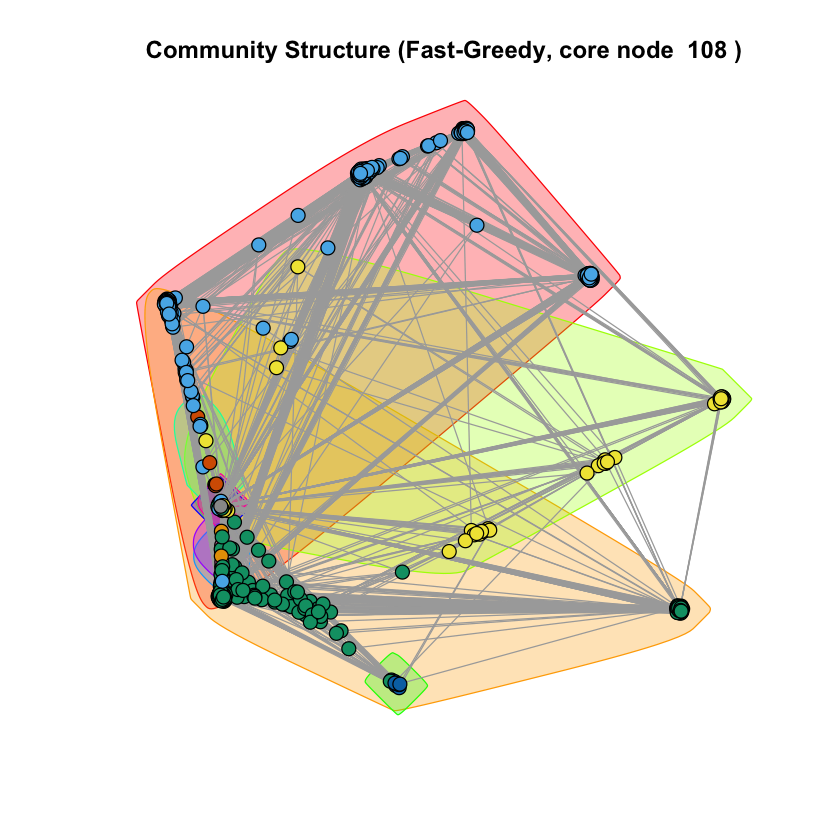

   infomap: 0.5082492 


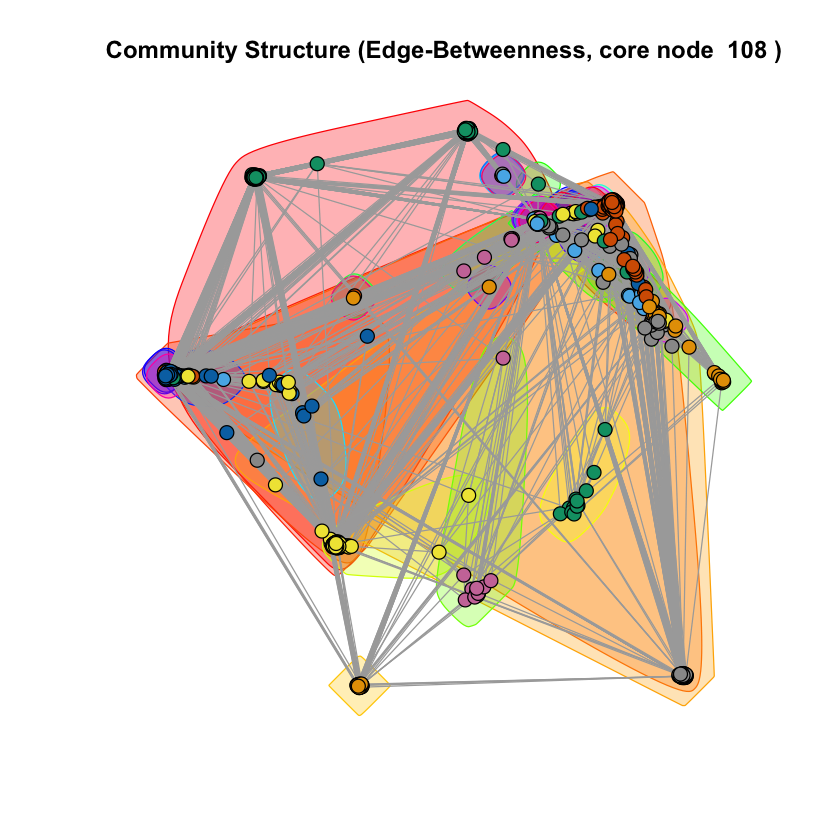

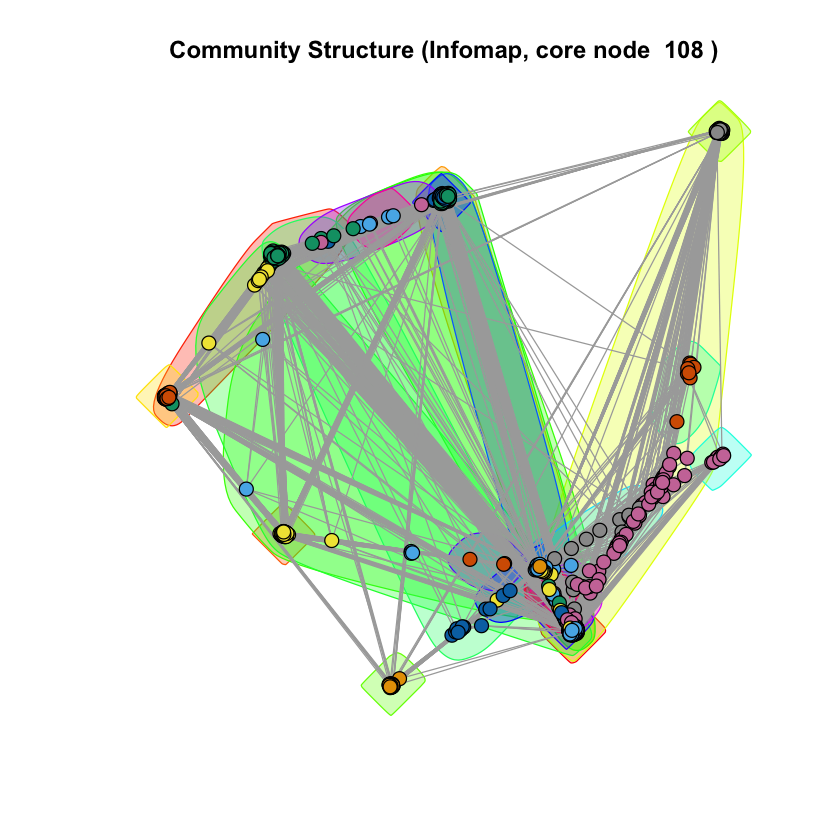

In [6]:
ids <- c(1, 108)
pnetworks <- make_ego_graph(network, 1, nodes=V(network)[ids])

for (i in 1:2) {
    cat("id:", ids[i], "\n")
    
    # 1 Fast-Greedy
    fc <- cluster_fast_greedy(pnetworks[[i]])
    cat("  ", "fast_greedy:", modularity(fc), "\n")
    # plot community structure
    fc_node_color <- fc$membership + 1
    plot(pnetworks[[i]], mark.groups=groups(fc), edge.arrow.size=.5, 
         vertex.color=fc_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Fast-Greedy, core node ",ids[i],")",collapse=""))
    
    # 2 Edge-Betweenness
    ec <- cluster_edge_betweenness(pnetworks[[i]])
    cat("  ", "edge_betweenness:", modularity(ec), "\n")
    # plot community structure
    ec_node_color <- ec$membership + 1
    plot(pnetworks[[i]], mark.groups=groups(ec), edge.arrow.size=.5, 
     vertex.color=ec_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Edge-Betweenness, core node ",ids[i],")",collapse=""))
    
    # 3 Infomap
    ic <- cluster_infomap(pnetworks[[i]])
    cat("  ", "infomap:", modularity(ic), "\n")
    # plot community structure
    ic_node_color <- ic$membership + 1
    plot(pnetworks[[i]], mark.groups=groups(ic), edge.arrow.size=.5, 
     vertex.color=ic_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Infomap, core node ",ids[i],")",collapse=""))
    cat("\n")
}
